In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Data import and data cleansing

In [3]:
# Load the CSV into a DataFrame:
file = './data/bertavivesm.20221129144401885.data.csv'
df = pd.read_csv(file,delimiter=';')

In [4]:
# The columns of interest are selected and a new DataFrame is created
data = df[['#time',' R1_WNAC/WdSpd.Mean',' R1_WNAC/WdDir.Mean',' R1_WTRF/TrfGriVAr.Mean',' R1_WTRF/TrfGriW.Mean',' R1_WTRF/TrfGriPf.Mean']]

In [5]:
# Column names are changed to make the dataframe more understandable.
data.columns = ['time','Wind Speed','Wind Direction','Reactive Power','Active Power','Phase Angle']

In [6]:
data

,time,Wind Speed,Wind Direction,Reactive Power,Active Power,Phase Angle
0,2012-11-20 00:00:00,14.90,201.80,-0.666463,5.166350,-0.99460
1,2012-11-20 00:01:00,14.90,201.80,-0.625202,5.154180,-0.99460
2,2012-11-20 00:02:00,14.70,204.10,-0.658773,5.136520,-0.99450
3,2012-11-20 00:03:00,14.30,208.50,-0.628620,5.021540,-0.99675
4,2012-11-20 00:04:00,13.45,209.65,-0.647664,5.094510,-0.99610
...,...,...,...,...,...,...
5230753,2017-11-20 23:55:00,2.95,120.45,0.031556,-0.063793,0.36055
5230754,2017-11-20 23:56:00,2.45,112.95,0.031556,-0.092756,0.39160
5230755,2017-11-20 23:57:00,1.80,107.30,0.044557,-0.106760,0.60230
5230756,2017-11-20 23:58:00,2.70,120.00,0.024293,-0.076840,0.29820


## Data information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5230758 entries, 0 to 5230757
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            object 
 1   Wind Speed      float64
 2   Wind Direction  float64
 3   Reactive Power  float64
 4   Active Power    float64
 5   Phase Angle     float64
dtypes: float64(5), object(1)
memory usage: 239.4+ MB


In [8]:
data.describe()

,Wind Speed,Wind Direction,Reactive Power,Active Power,Phase Angle
count,5.230758e+06,5.230758e+06,5.230758e+06,5.230758e+06,5.230758e+06
mean,6.635825e+04,5.605512e+04,1.506902e+04,1.507089e+04,5.083837e+04
std,2.488902e+05,2.296364e+05,1.218271e+05,1.218253e+05,2.196691e+05
min,8.000000e-01,0.000000e+00,-1.734180e+00,-1.682530e-01,-1.000000e+00
25%,5.750000e+00,1.293000e+02,-1.019930e-01,2.820310e-01,-9.999000e-01
50%,9.000000e+00,2.086500e+02,-1.770020e-03,1.980450e+00,-9.959500e-01
75%,1.300000e+01,2.698500e+02,1.322670e-01,5.055020e+00,-4.776500e-01
max,9.999993e+05,9.999993e+05,9.999993e+05,9.999993e+05,9.999993e+05


/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_13552/4277230119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


<AxesSubplot: >

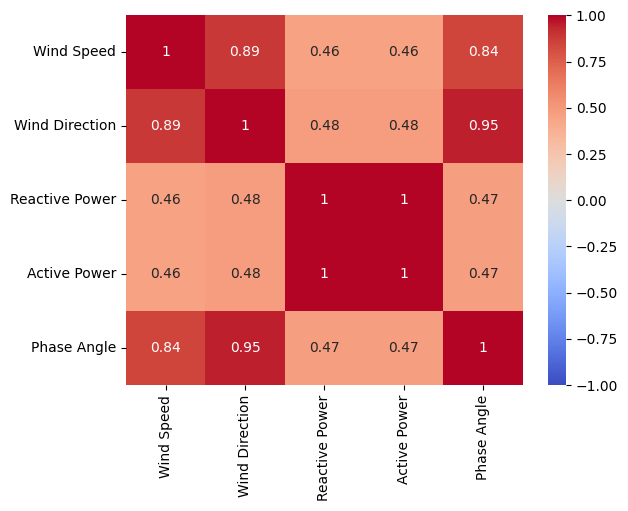

In [13]:
sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

## Statistical description and visualisation of data

In [16]:
# MEDIDAS DE TENDENCIA CENTRAL
def med_tend_central(valores):
    media = np.mean(valores)
    mediana = np.median(valores)
    print(f'MEDIDAS DE TENCENCIA CENTRAL:\nMedia = {media}\nMediana = {mediana}')

# MEDIDAS DE VARIABILIDAD
def med_var(valores):
    desvest = np.std(valores) 
    percentil25 = np.percentile(valores, 25)
    percentil75 = np.percentile(valores, 75)
    print(f'MEDIDAS DE VARIABILIDAD:\nDesviación estándar = {desvest}\nRango intercuatílico = {percentil75-percentil25}')

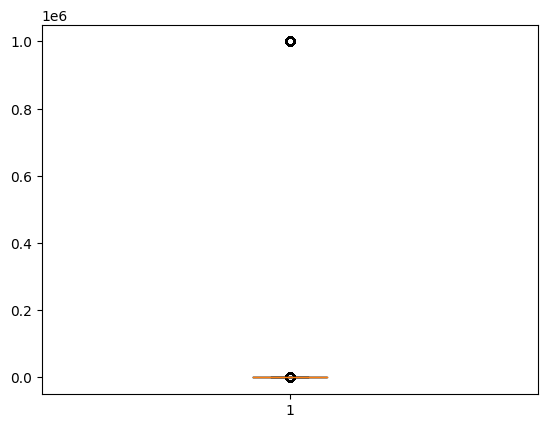

In [23]:
plt.boxplot(data['Phase Angle'])
plt.show()